# Мазур Анастасия Вадимовна, 316 группа ВМК МГУ
## 10 APTV Aptiv Consumer Discretionary

**Задание:**

Далее на R или Python

- ✅ Получить данные цен закрытия своего варианта
- ✅ Перейти к доходностям по формуле
$$r_{t} = \frac{S_{t}}{S_{t−1}} − 1$$
  &emsp;&emsp;&emsp; Доходности сохраните в переменную `rates`
- ✅ Проверить гипотезу случайности для доходностей. Сделать вывод: Отвергается или нет гипотеза случайности
- ✅ Проверить гипотезу однородности для части данных доходностей до 1 июля 2022 года и последующих. Сделать вывод: Отвергается или нет гипотеза однородности двух частей выборки. 
- ✅ Предложить наиболее адекватный тип распределения для доходностей.   
На R это можно сделать так: 

```
        d = sort(sample(length(rates), length(rates)*.5))
        head(d)
        #select training sample
        train<-rates[d,]
        test<-rates[-d,]

``` 
- ✅ Методом максимального правдоподобия оценить параметры предполагаемого распределения по тренировочной части выборки.
 На R для этого можно использовать функцию
`fitdist(train,distr="chisq",start=list(df=5))`
- ✅ Проверить гипотезу согласия с предложенным распределением всей выборки критериями Колмогорова-Смирнова и Хи-квадрат Пирсона

In [ ]:
import pandas as pd

! pip install yfinance # Импорт исторических цен закрытия проводятся из пакета yfinance
import yfinance as yf

import time

import warnings
warnings.filterwarnings("ignore") # Выключаю преждупреждающие сообщения, чтобы не "засорять" вывод

Зададим дату начала импорта 2022-01-01

In [2]:
start_day = '2022-01-01'

Исторические ежедневные цены закрытия для одного тикера можно получить методом `get_One_Asset()`

In [3]:
def get_One_Asset(company,start_day):
    df = pd.DataFrame()
    returns = yf.Ticker(company)
    data = returns.history(period = "1y", start = start_day)
    df.index = data.index
    df[company] = data.Close
    return df

Получим данные в переменную `asset` типа `pd.DataFrame()` и сохраним эти данные в csv файл для импорта в R

In [4]:
company ='APTV'
asset = get_One_Asset(company, start_day)
asset.head()

,APTV
Date,
2022-01-03 00:00:00-05:00,166.029999
2022-01-04 00:00:00-05:00,172.210007
2022-01-05 00:00:00-05:00,168.279999
2022-01-06 00:00:00-05:00,174.119995
2022-01-07 00:00:00-05:00,169.470001


In [5]:
filename = 'myData.csv'
asset.to_csv(filename, index = True)

In [6]:
asset['rates'] = 0
for t in range (1, len(asset.APTV)):
    asset['rates'][t] = (asset.APTV[t] / asset.APTV[t - 1]) - 1
    
asset.to_csv('myData.csv', index = True)
asset.head()

,APTV,rates
Date,,
2022-01-03 00:00:00-05:00,166.029999,0.000000
2022-01-04 00:00:00-05:00,172.210007,0.037222
2022-01-05 00:00:00-05:00,168.279999,-0.022821
2022-01-06 00:00:00-05:00,174.119995,0.034704
2022-01-07 00:00:00-05:00,169.470001,-0.026706


Далее код на R:

In [ ]:
# Выключаю вывод предупреждающих сообщений warning
oldw <- getOption("warn")
options(warn = -1)

# Подгружаю все необходимые библиотеки
library(randtests)
library(dplyr)
library(rriskDistributions)
library(fitdistrplus)
require(MASS)
library(LambertW)
library(ggplot2)
library(vcd)
library(zoo)

Выгружаю доходности в отдельную переменную

In [4]:
my_data <- read.csv(file = "./myData.csv", header = TRUE)
rates <- my_data$rates
rates_df <- data.frame(rates)
head(rates_df)

,rates
,<dbl>
1,0.00000000
2,0.03722224
3,-0.02282102
4,0.03470404
5,-0.02670569
6,-0.02596326


Посмотрим, как выглядят данные по доходностям. Для этого построим точечный график и гистограмму.

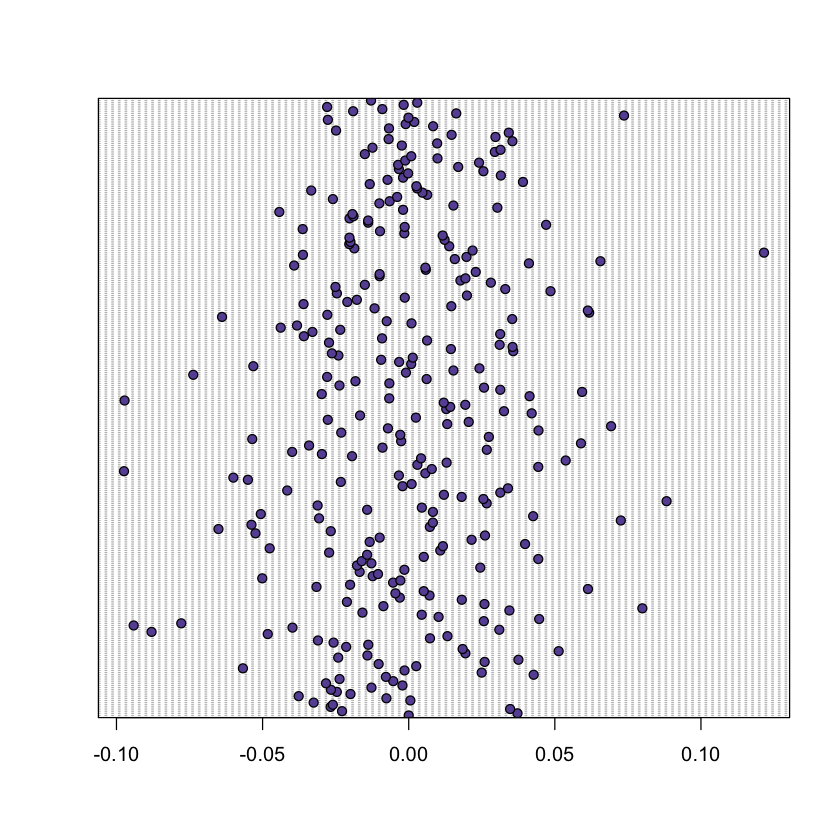

In [34]:
dotchart(rates, bg = "#6852A3")

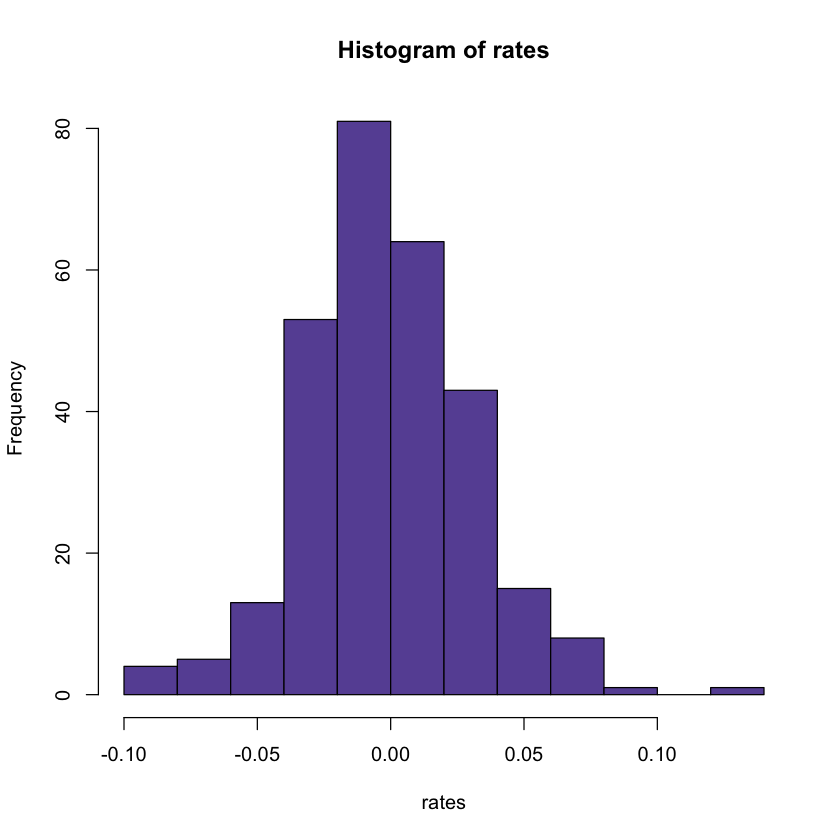

In [33]:
hist(rates, col = "#6852A3")

<h2>
<span style="color:#6852A3">
Гипотеза случайности
</span>
</h2>

Проверим гипотезу случайности для доходностей.  
**Нулевая гипотеза** $H_0$: выборка доходностей является выборкой из независимых наблюдений над некоторой случайной величиной $\xi$
**Альтернативная гипотеза** $H_1$: элементы выборки не являются случайными величинами, то есть они не являются независимыми и не распределены одинаково  
    
Для этого проведём несколько тестов. Уровень статистической значимости: $p\_value = 5 \% = 0.05$

#### 1. Тест Манна-Кендалла

**Тест тренда Манна-Кендалла** используется для определения того, существует ли тренд в данных временного ряда. Это непараметрический тест, означающий, что не делается никаких предположений о нормальности данных.

Гипотезы для теста следующие:  
**Нулевая гипотеза** $H_0$: в данных отсутствует тренд (т.е. данные распределены нормально)  
**Альтернативная гипотеза** $H_1$: в данных присутствует тенденция (Это может быть как положительная, так и отрицательная тенденция)

In [6]:
rank.test(rates)


	Mann-Kendall Rank Test

data:  rates
statistic = 1.5563, n = 288, p-value = 0.1196
alternative hypothesis: trend


Данный тест показал значение $p\_value > 0.05 \Rightarrow $ в данных отсутствует тренд, то есть гипотеза случайности не отвергается.

#### 2. Тест Бартлетта

Тест Бартлетта — это статистический тест, который используется для определения того, равны ли дисперсии между несколькими группами (выборками). 
  
Тест Бартлетта использует следующие нулевые и альтернативные гипотезы :

**Нулевая гипотеза** $H_0$: Дисперсия среди каждой группы равна  
**Альтернативная гипотеза** $H_1$: По крайней мере, одна группа имеет дисперсию, не равную остальным

In [7]:
bartels.rank.test(rates)


	Bartels Ratio Test

data:  rates
statistic = -0.30662, n = 288, p-value = 0.7591
alternative hypothesis: nonrandomness


Данный тест показал значение $p\_value > 0.05 \Rightarrow $ в данных доходностей дисперсии одинаковы для каждой подвыборки, то есть гипотеза случайности не отвергается.

#### 3. Тест случайности Кокса Стюарта

Так же как и тест Манна-Кендалла данный критерий используется для проверки наличия тренда среднего и дисперсии в последовательности наблюдений. 

In [30]:
cox.stuart.test(rates)


	Cox Stuart test

data:  rates
statistic = 74, n = 144, p-value = 0.8027
alternative hypothesis: non randomness


Данный тест показал значение $p\_value > 0.05 \Rightarrow $ в данных отсутствует тренд, то есть гипотеза случайности не отвергается.

#### 4. Runs test

Runs test - это статистический тест, который используется для определения того, получен ли набор данных в результате случайного процесса.

Нулевая и альтернативные гипотезы теста заключаются в следующем:

**Нулевая гипотеза** $H_0$: Данные были получены случайным образом  
**Альтернативная гипотеза** $H_1$: Данные не были получены случайным образом

In [31]:
runs.test(rates)


	Runs Test

data:  rates
statistic = 0.35417, runs = 148, n1 = 144, n2 = 144, n = 288, p-value =
0.7232
alternative hypothesis: nonrandomness


Данный тест показал значение $p\_value > 0.05 \Rightarrow $ нулевая гипотеза о случайности данных не отвергается.

#### 5. Turning Point Test

Ещё один тест для проверки случайности данных.

In [32]:
turning.point.test(rates)


	Turning Point Test

data:  rates
statistic = 0.88791, n = 288, p-value = 0.3746
alternative hypothesis: non randomness


Данный тест показал значение $p\_value > 0.05 \Rightarrow $ гипотеза случайности не отвергается.

#### Вывод:
Все тесты единогласно говорят о том, что данные о доходностях распределены случайно, тренд отсутствует, дисперсия одинакова для всех групп.

<h2>
<span style="color:#6852A3">
Гипотеза однородности
</span>
</h2>

Проверим однородность данных для части данных доходностей до 1 июля 2022 года и последующих.  

**Нулевая гипотеза** $H_0$: В качестве основной гипотезы выдвинем предположение об идентичности функций распределения для двух выборок  
**Альтернативная гипотеза** $H_1$: данные в двух выборках распределены не идентично
    
Уровень статистической значимости: $p\_value = 5 \% = 0.05$

Для этого проведём несколько тестов. 

Сначала сформируем две выборки:

In [37]:
sample1 = my_data[my_data["Date"] < '2022-07-01',]
sample2 = my_data[my_data["Date"] >= '2022-07-01',]

tail(sample1)
head(sample2)

,Date,APTV,rates
,<chr>,<dbl>,<dbl>
119,2022-06-23 00:00:00-04:00,92.14,0.012972739
120,2022-06-24 00:00:00-04:00,97.09,0.053722563
121,2022-06-27 00:00:00-04:00,97.50,0.004222924
122,2022-06-28 00:00:00-04:00,95.61,-0.019384609
123,2022-06-29 00:00:00-04:00,92.77,-0.029704047
124,2022-06-30 00:00:00-04:00,89.07,-0.039883552


,Date,APTV,rates
,<chr>,<dbl>,<dbl>
125,2022-07-01 00:00:00-04:00,91.45,0.026720526
126,2022-07-05 00:00:00-04:00,90.63,-0.008966645
127,2022-07-06 00:00:00-04:00,87.54,-0.034094631
128,2022-07-07 00:00:00-04:00,92.70,0.058944437
129,2022-07-08 00:00:00-04:00,92.46,-0.002588974
130,2022-07-11 00:00:00-04:00,87.51,-0.053536632


Итак, выборки сформированы верно. Видно, что в первой содержатся все записи до 1 июля, а во второй - записи после этой даты.
Однако мы можем видеть, что количество значений в этих таблицах разное: в первой выборке 124 элемента, во второй - 164.  
Для корректной работы тестов выбросим некоторые данные из второй таблицы, чтобы размеры выборок были одинаковыми.

In [42]:
nrow(sample1)
nrow(sample2)

[1] 124

[1] 164

In [43]:
size = min(nrow(sample1), nrow(sample2))

ssample1 <- head(sample1$APTV, size)
ssample2 <- head(sample2$APTV, size)

sample1_vec <- as.vector(ssample1)
sample2_vec <- as.vector(ssample2)

Данные записаны в переменные в качестве векторов одинаковой длины. Теперь мы можем проводить тесты.

#### 1. Критерий Уилкоксона

In [36]:
wilcox.test(sample1_vec, sample2_vec, paired = T)


	Wilcoxon signed rank test with continuity correction

data:  sample1_vec and sample2_vec
V = 7198, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Данный тест показал значение $p\_value < 0.05 \Rightarrow $ гипотеза однородности отвергается.

#### 2. Критерий Смирнова

In [45]:
ks.test(sample1_vec, sample2_vec)


	Asymptotic two-sample Kolmogorov-Smirnov test

data:  sample1_vec and sample2_vec
D = 0.54032, p-value = 3.331e-16
alternative hypothesis: two-sided


Данный тест показал значение $p\_value < 0.05 \Rightarrow $ гипотеза однородности отвергается.

#### Вывод:
Оба теста говорят о том, что данные о доходностях распределены не идентично, т.е. они не однородны.

<h2>
<span style="color:#6852A3">
Распределение
</span>
</h2>

Попробуем предложить наиболее адекватный тип распределение данных по доходностям.   
Для этого воспользуемся функцией `fit.cont()` из библиотеки `rriskDistributions`.

In [70]:
fit.cont(data2fit = rates)


Begin fitting distributions ---------------------------------------

* fitting normal distribution ... OK

* fitting Cauchy  distribution ... OK

* fitting logistic distribution ... OK

* fitting beta distribution ... failed

* fitting exponential distribution ... failed

* fitting chi-square distribution ... failed

* fitting uniform distribution ... OK

* fitting gamma distribution ... failed

* fitting lognormal distribution ... failed

* fitting Weibull distribution ... failed

* fitting F-distribution ... failed

* fitting Student's t-distribution ... OK

* fitting Gompertz distribution ... failed

* fitting triangular distribution ... failed

End fitting distributions -----------------------------------------




            logL      AIC      BIC Chisq(value) Chisq(p) AD(value)        H(AD)
Normal    587.05 -1170.09 -1162.77        22.94     0.06      0.75 not rejected
Cauchy    551.25  -1098.5 -1091.17        67.46     0.00      3.43     rejected
Logistic  591.11 -1178.22 -1170.89        19.91     0.13      0.32 not rejected
Uniform     NULL     NULL     NULL        62.51     0.00       Inf         NULL
Student  -265.13   532.26   535.92      7051.60     0.00    103.46         NULL
         KS(value)        H(KS)
Normal        0.05 not rejected
Cauchy        0.07 not rejected
Logistic      0.03 not rejected
Uniform       0.11     rejected
Student       0.46     rejected
Error in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...) : 
  не могу найти никаких шрифтов X11
Проверьте, правильно ли указан Font Path.

Chosen continuous distribution is: Normal (norm)
Fitted parameters are: 
         mean            sd 
-0.0007790068  0.0315149064 



Тест Колмогорова-Смирнова (**H(KS)** в таблице) не отвергает 3 распределения:
- Нормальное
- Коши
- Логистическое
  
Тест Андерсона Дарлинга (**H(AD)** в таблице) не отвергает 2 распределения:
- Нормальное
- Логистическое

$p\_value$ в тесте $\chi$-квадрат (**Chisq(p)** в таблице) $> 0.05$ для 2 распределений:
- Нормальное
- Логистическое

Взглянем на графики:

<img  src="norm_distr.png" ></img>

<img  src="cauchy_distr.png" ></img>

<img  src="logistic_distr.png" ></img>

График распределения Коши имеет более острую вершину. Отклоняем это распределение для наших данных.  
Чтобы выбрать наиболее подходящее распределение между Нормальным и Логистическим обратимся к значению критерия Акаике (**AIC** в таблице). Лучшая модель соответствует минимальному значению критерия Акаике. В нашем случае наименьшее значение достигается при Логистической модели распределения, хотя отличия с Нормальным не так существенны.

#### Вывод:
Предложение: данные по доходностям распределены согласно логистическому закону.

<h2>
<span style="color:#6852A3">
Метод максимального правдоподобия
</span>
</h2>

С помощью метода максимального правдоподобия оценим параметры предполагаемого распределения (логистическое) по тренировочной части выборки.

In [50]:
d = sort(sample(nrow(rates_df), nrow(rates_df)*.5))
head(d)
#select training sample
train<-rates[d]
test<-rates[-d]

head(data.frame(train))
head(data.frame(test))

[1]  7  8 13 20 23 25

,train
,<dbl>
1,-0.0325317147
2,0.0005635337
3,-0.0265972358
4,0.0427546670
5,-0.0567278994
6,-0.0102874481


,test
,<dbl>
1,0.00000000
2,0.03722224
3,-0.02282102
4,0.03470404
5,-0.02670569
6,-0.02596326


In [53]:
fitting_logis <- fitdist(train, distr = "logis")
summary(fitting_logis)

Fitting of the distribution ' logis ' by maximum likelihood 
Parameters : 
             estimate  Std. Error
location -0.001076471 0.002513532
scale     0.017553615 0.001221421
Loglikelihood:  292.5624   AIC:  -581.1247   BIC:  -575.1851 
Correlation matrix:
            location       scale
location 1.000000000 0.005448053
scale    0.005448053 1.000000000


<h2>
<span style="color:#6852A3">
Гипотеза согласия
</span>
</h2>

#### 1. Тест Колмогорова-Смирнова

Проверим гипотезу согласия с полученным ранее распредением с помощью теста Колмогорова-Смирнова.
- на тестовой выборке:

In [68]:
ks.test(test, fitting_logis$estimate)


	Exact two-sample Kolmogorov-Smirnov test

data:  test and fitting_logis$estimate
D = 0.53472, p-value = 0.4433
alternative hypothesis: two-sided


- на всей выборке:

In [69]:
ks.test(rates, fitting_logis$estimate)


	Exact two-sample Kolmogorov-Smirnov test

data:  rates and fitting_logis$estimate
D = 0.52431, p-value = 0.4577
alternative hypothesis: two-sided


Гипотеза согласия не отвергается.

#### 2. Тест $\chi$-квадрат Пирсона

Вспомним, какие параметры для логистического распределения мы получили на тренировочных данных:

In [140]:
fitting_logis
location <- fitting_logis$estimate[1]
scale <- fitting_logis$estimate[2]

Fitting of the distribution ' logis ' by maximum likelihood 
Parameters:
             estimate  Std. Error
location -0.001076471 0.002513532
scale     0.017553615 0.001221421